## obtendo a fornteira eficiente em python

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt


In [2]:
acoes = ['ABCB4.SA', 'RAIZ4.SA']

pf_data = pd.DataFrame()

for a in acoes:
    pf_data[a] = yf.download(a, start='2023-01-01', end='2024-01-01')['Adj Close']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [3]:
pf_data.tail()

,ABCB4.SA,RAIZ4.SA
Date,,
2023-12-21,22.891087,4.011419
2023-12-22,22.977720,4.180634
2023-12-26,23.208752,4.120911
2023-12-27,23.478285,4.041280
2023-12-28,24.103987,4.011419


<Axes: xlabel='Date'>

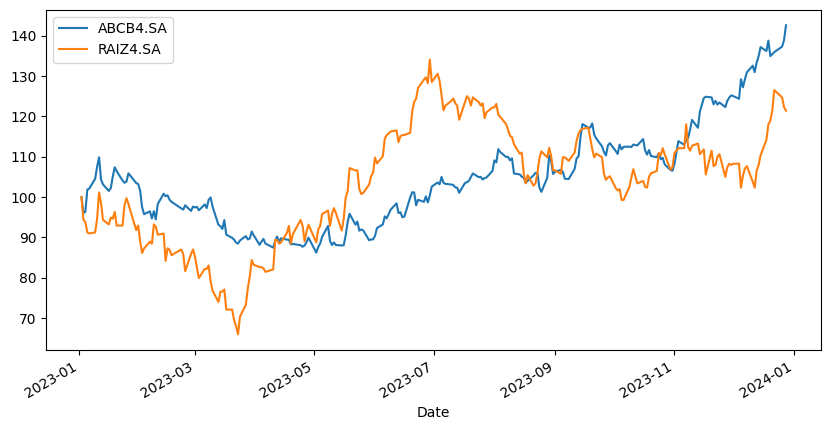

In [4]:
(pf_data / pf_data.iloc[0] * 100).plot(figsize=(10, 5))


In [5]:
log_returns = np.log(pf_data / pf_data.shift(1))

In [6]:
log_returns.mean() * 250

ABCB4.SA    0.358811
RAIZ4.SA    0.196014
dtype: float64

In [7]:
log_returns.cov() * 250

,ABCB4.SA,RAIZ4.SA
ABCB4.SA,0.078219,0.038782
RAIZ4.SA,0.038782,0.183270


In [8]:
log_returns.corr()

,ABCB4.SA,RAIZ4.SA
ABCB4.SA,1.00000,0.32391
RAIZ4.SA,0.32391,1.00000


In [9]:
num_acoes = len(acoes)

In [10]:
num_acoes

2

In [15]:
arr = np.random.random(2)
arr

array([0.52273288, 0.13602359])

In [16]:
arr[0] + arr[1]

0.6587564752984033

dessa forma a soma dos dois pesos gerados aleatoriamente será sempre 1

In [17]:
weights = np.random.random(num_acoes)
weights /= np.sum(weights)
weights

array([0.4109924, 0.5890076])

In [18]:
weights[0] + weights[1]

1.0

expected portfolio return

In [19]:
np.sum(weights * log_returns.mean()) * 250

0.26292205243839234

expected portfolio variance

In [20]:
np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))

0.09557081343612041

expected portfolio volatility

In [21]:
np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 250, weights)))

0.30914529502504223

In [22]:
pfolio_returns = []
pfolio_volatilities = []

for x in range(1000):
    weights = np.random.random(num_acoes)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))))
pfolio_returns, pfolio_volatilities

([0.322578579706205,
  0.20874914043186008,
  0.20192881805760704,
  0.25905859178356383,
  0.2911597421062622,
  0.258638033692073,
  0.2694162694376657,
  0.33723551703805316,
  0.2638936038681573,
  0.24801309890769216,
  0.2923870759372128,
  0.35211701103428883,
  0.27908888174635965,
  0.2516492724259438,
  0.2653218426739402,
  0.32379063137967207,
  0.26321535326373574,
  0.2119498662734379,
  0.2660288592972345,
  0.3410673834137052,
  0.3110793872379796,
  0.25280933383862875,
  0.25485467728794176,
  0.21925754136141898,
  0.3439464655651121,
  0.28720323149557214,
  0.27177590787517436,
  0.30214216073642375,
  0.2886536982116013,
  0.25120826153741355,
  0.2626397603822939,
  0.2579415334967055,
  0.2941225910850739,
  0.2168102240084229,
  0.34922254203948,
  0.2865591747658023,
  0.1971129025258838,
  0.2032034862217716,
  0.3536584350540503,
  0.28866213906385807,
  0.239798626286641,
  0.24375489319575755,
  0.23263774634123668,
  0.2674731260340194,
  0.19784701053722

In [23]:
pfolio_returns = []
pfolio_volatilities = []

for x in range(1000):
    weights = np.random.random(num_acoes)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))))

pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)

pfolio_returns, pfolio_volatilities

(array([0.22362714, 0.27609209, 0.32903523, 0.24231641, 0.28239267,
        0.31650696, 0.34139991, 0.35085559, 0.25534523, 0.31523342,
        0.34815948, 0.22914133, 0.3484467 , 0.22718993, 0.23942315,
        0.21711847, 0.27104403, 0.28550581, 0.32285414, 0.34788737,
        0.26395534, 0.25180486, 0.21954368, 0.26748561, 0.2940314 ,
        0.2634949 , 0.33285891, 0.25073474, 0.27349063, 0.28817963,
        0.3470984 , 0.25023721, 0.32351592, 0.29361113, 0.24770584,
        0.25124074, 0.272223  , 0.33241768, 0.31340864, 0.22330609,
        0.26712391, 0.29304862, 0.27419223, 0.21147424, 0.27242945,
        0.33770037, 0.24789823, 0.27747888, 0.29456494, 0.32144558,
        0.31393603, 0.2912744 , 0.29335049, 0.29592957, 0.34633172,
        0.29416661, 0.31731518, 0.27286346, 0.31435434, 0.35435274,
        0.31135109, 0.30853623, 0.33499338, 0.24859872, 0.29924136,
        0.2709994 , 0.30016712, 0.23214712, 0.2791174 , 0.27103664,
        0.31965582, 0.26305241, 0.28118711, 0.29